# Title: Investigating Fandango Movie Ratings
## In October 2015, a data journalist named Walt Hickey reported that Fandango's rating system was biased and dishonest. Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actural raging, which was able to be found in the HTML of the page. Fandango's officials replied that they would fix the bug as soon as possible
## Goal of this project is to investigate more recent movie ratings data to determine whether there has been any change in Fandango's raging system after Hickey's analysis.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
fandango_compare_df = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_df = pd.read_csv('movie_ratings_16_17.csv')

In [32]:
fandango_2015 = fandango_compare_df.loc[fandango_compare_df.FILM.str.contains('2015'), 
                                        ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                                         'Fandango_votes','Fandango_Difference']]
fandango_2016 = movie_ratings.loc[movie_ratings.year == 2016, ['movie', 'year', 'fandango']]

In [33]:
fandango_2015.head()

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5

In [34]:
fandango_2016.head()

movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
4  A Hologram for the King  2016       3.0
5          A Monster Calls  2016       4.0

## Population: All the movies that rated by Fandango's rating system.
## 1. The sampling is not totally random, movie_ratings_2017 selected 214 of most popular movies, and fandango_comparison of 2015 selected movies with at least 30 fan reviews at Fandango, so both of them selected kind of more popular movies, no totally random selection. So the resulting samples are very unlikely to be representative of the population we're interesting in describing.
## 2. Change slightly the current goal of analysis to investigate the fandango rating bias for most popular movies.
## In solution notebook https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb , the goal is changed to find out whether there is any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.
## New population: All Fandango's ratings for popular movies released in 2015 and all Fandango's ratings for popular movies released in 2016.

In [35]:
# fandango_2015.Fandango_votes.plot.hist()
# sns.boxplot(fandango_2015.Fandango_votes, orient ='vertical', width = .15)
fandango_2015[fandango_2015.Fandango_votes <= 30]
# All sample points of 2015 are movies with over 30 fan ratings

Empty DataFrame
Columns: [FILM, Fandango_Stars, Fandango_Ratingvalue, Fandango_votes, Fandango_Difference]
Index: []

### All sample points of 2015 are movies with over 30 fan ratings
### What about the sample of 2016?
### Since movie_ratings for 2016 are selected from most popular movies, definetly, rating number are far more than 30 .
--------
## Whether there's any difference between Fandango's ratings for popular movies in 2015 and 2016.

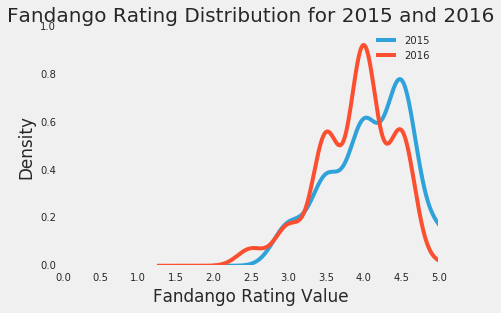

In [87]:
plt.style.use('fivethirtyeight')
#fandango_2015.Fandango_Ratingvalue.plot.kde()
fandango_2015.Fandango_Stars.plot.kde()
fandango_2016.fandango.plot.kde()
plt.title('Fandango Rating Distribution for 2015 and 2016', fontsize = 20)
plt.xlabel('Fandango Rating Value')
plt.ylabel('Density')
plt.legend(['2015', '2016'], loc = 'best')
plt.xlim(0,5)
plt.grid(False)
#ticks = np.arange(0,5.1,0.5)
plt.xticks(np.arange(0,5.1,0.5))
plt.show()

*  Both of the shapes are left skewed, meaning most of the data pile up to the higher rating vlaues.
*  Shape of 2016 is different from 2015, 2015 data skewed more than 2016 data.
*  Movies in 2016 rated slightly lower than 2015.

In [85]:
fandango_2015.Fandango_Stars.value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [86]:
fandango_2016.fandango.value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

* ## Since 2015 and 2016 data contain different number of movies, absolute frequency is not useful here, relative frequency should be more helpful, and percentages should be better for readability.

In [89]:
fandango_2015.Fandango_Stars.value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [90]:
fandango_2016.fandango.value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

## Frequency table showed that there is a clear difference between the two distributions.
## The direction of difference is not as clear as it was on the kenel density plots.

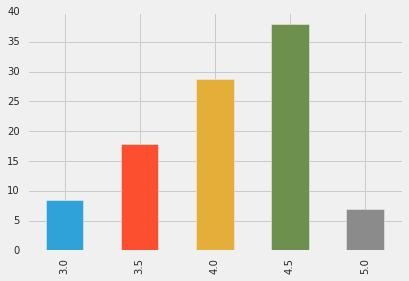

In [91]:
(fandango_2015.Fandango_Stars.value_counts(normalize=True).sort_index() * 100).plot.bar()

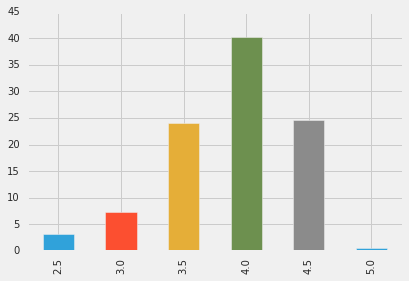

In [94]:
(fandango_2016.fandango.value_counts(normalize=True).sort_index() * 100).plot.bar()

## Mean, median, mode for each distribution

In [95]:
mean_2015 = fandango_2015.Fandango_Stars.mean()
median_2015 = fandango_2015.Fandango_Stars.median()
mode_2015 = fandango_2015.Fandango_Stars.mode()

mean_2016 = fandango_2016.fandango.mean()
median_2016 = fandango_2016.fandango.median()
mode_2016 = fandango_2016.fandango.mode()

In [96]:
print('2015 mean: {}, median: {}, mode: {}'.format(mean_2015, median_2015, mode_2015))
print('2016 mean: {}, median: {}, mode: {}'.format(mean_2016, median_2016, mode_2016))

2015 mean: 4.0852713178294575, median: 4.0, mode: 0    4.5
dtype: float64
2016 mean: 3.887434554973822, median: 4.0, mode: 0    4.0
dtype: float64


In [141]:
#plt.style.use('fivethirtyeight')
labels = ['mean', 'median', 'mode']
data_2015 = [float(mean_2015), float(median_2015), float(mode_2015)]
data_2016 = [float(mean_2016), float(median_2016), float(mode_2016)]
#data_2015 = [3, 4, 5]
#data_2016 = [4, 5, 6]
#plt.bar(np.arange(1,4), [mean_2015, median_2015, mode_2015])
x = np.arange(len(labels)) # The label location
width = 0.4

fig,ax = plt.subplots()

rect_2015 = ax.bar(x - width/2, data_2015, width, label = '2015', color = 'b')
rect_2016 = ax.bar(x, data_2016, width, label = '2016', color = 'red')

ax.set_ylabel('Stars')
ax.set_title('Comparing summary statistics: 2015 vs 2016', y = 1.08) #title position upper
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 5)
ax.set_yticks(np.arange(0,5.1,0.5))
ax.legend(loc = 'upper center')

fig.tight_layout()

plt.show()

* Mean of 2015 is slightly higher than 2016, mode is clearly higher than 2016, median are same.

In [107]:
data_2016

[3.887434554973822, 4.0, 0    4.0
 dtype: float64]

In [108]:
type(mean_2015)

numpy.float64

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

Try to wrap up your work by writing a conclusion that's no more than two paragraphs. In one of the paragraphs, try to answer what caused the change revealed by our analysis.

These are a few next steps to consider:

    Customize your graphs more by reproducing almost completely the FiveThirtyEight style. You can take a look at this tutorial if you want to do that.
    Improve your project from a stylistical point of view by following the guidelines discussed in this style guide.
    Use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating. There are many approaches you can take here â€” you can take some inspiration from this article.
    Collect recent movie ratings data and formulate your own research questions. You can take a look at this blog post to learn how to scrape movie ratings for IMDB and Metacritic.
